In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pymc3 as pm
from scipy.stats import multivariate_normal

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./data/train.csv')
data.describe()

,Id,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,Category
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,...,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,157.000000,0.140018,0.116428,0.147523,0.166251,0.159290,0.154911,0.171788,0.163420,0.172034,...,0.563733,0.576017,0.572355,0.580488,0.599886,0.639733,0.631687,0.633445,0.670396,0.346667
std,21.794495,0.531072,0.533557,0.515018,0.513822,0.506893,0.501646,0.484376,0.499714,0.497433,...,0.742961,0.740551,0.764901,0.733439,0.786804,0.754772,0.783581,0.783238,0.775564,0.479113
min,120.000000,-1.044003,-0.994305,-0.885585,-0.761513,-0.717464,-0.757696,-0.578701,-0.647595,-0.474244,...,-0.218118,-0.130778,-0.242646,-0.238697,-0.183577,-0.199834,-0.194937,-0.300764,-0.150227,0.000000
25%,138.500000,-0.102221,-0.094447,-0.071158,-0.059394,-0.101118,-0.092047,-0.081801,-0.059817,-0.075092,...,0.027346,0.048706,0.028304,0.036863,0.017775,0.057197,0.025564,0.066313,0.064214,0.000000
50%,157.000000,0.051074,0.038222,0.050688,0.068801,0.057736,0.024308,0.044768,0.015566,0.001266,...,0.231157,0.202431,0.208260,0.193447,0.213291,0.220146,0.176925,0.207900,0.247912,0.000000
75%,175.500000,0.244199,0.212144,0.250240,0.215488,0.184486,0.189067,0.149534,0.138871,0.132242,...,0.790795,0.870270,0.924093,0.946616,1.148687,1.114469,1.114301,1.151813,1.212613,1.000000
max,194.000000,1.159202,1.139233,1.249389,1.217042,1.243997,1.208698,1.294389,1.222726,1.351073,...,2.098946,2.051068,2.155725,2.075734,2.084094,2.101399,2.219500,2.115519,2.118771,1.000000


In [3]:
data.head(10)

,Id,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,Category
0,120,0.147298,-0.142030,0.091737,-0.151707,0.060124,0.186191,-0.021298,-0.025636,0.061044,...,-0.218118,0.011316,0.079464,-0.010833,-0.053485,0.046450,-0.008333,0.168574,0.123273,0
1,121,0.115710,0.105061,0.038446,0.166711,-0.113913,0.004528,-0.006954,-0.140054,0.154231,...,0.021526,0.069009,-0.060343,0.094007,0.049558,0.112370,0.020398,0.039687,0.217384,0
2,122,-0.548826,-0.466551,-0.650890,-0.553450,-0.449101,-0.496902,-0.464860,-0.394458,-0.271801,...,0.057272,0.088062,-0.069730,0.168498,0.109672,0.202808,-0.019942,0.058902,0.053936,0
3,123,0.192618,0.291155,-0.042980,0.146483,0.015390,0.019394,-0.005577,-0.048682,0.025772,...,0.140831,0.257332,0.262786,0.351659,0.213291,0.251077,0.190920,0.251743,0.337730,1
4,124,0.075706,0.069045,-0.019818,0.068801,-0.226501,0.011658,0.087905,-0.080787,-0.080369,...,0.434803,0.322841,0.297772,0.461421,0.406143,0.562082,0.554588,0.471489,0.384229,1
5,125,1.081769,0.986722,1.067524,1.140523,0.975286,1.074729,0.871820,1.140957,1.276274,...,2.098946,1.882913,1.979897,1.852567,2.043995,2.059601,2.219500,2.038103,2.072409,1
6,126,0.212677,0.271821,0.052499,0.353935,0.177247,0.165208,0.077037,0.054077,0.001218,...,0.880501,0.894316,0.776692,0.910526,1.145064,1.302965,1.182394,1.286594,1.184424,1
7,127,-1.044003,-0.994305,-0.885585,-0.678902,-0.717464,-0.513387,-0.501884,-0.647595,-0.336069,...,0.607999,0.508485,0.442513,0.644257,0.838618,0.936488,0.929766,0.965134,1.024578,1
8,128,0.984083,0.938459,0.956299,0.922269,1.078399,1.107597,0.983515,1.222726,1.049279,...,1.937170,1.951902,2.069157,2.075734,1.953834,1.922141,1.913410,1.965790,1.956595,0
9,129,-0.056781,0.053274,0.033048,0.010449,0.101132,-0.055987,-0.045404,0.012941,-0.047868,...,0.231157,0.182868,0.240331,0.156288,0.218797,0.042883,0.127180,0.130278,0.162561,0


In [4]:
data.shape

(75, 102)

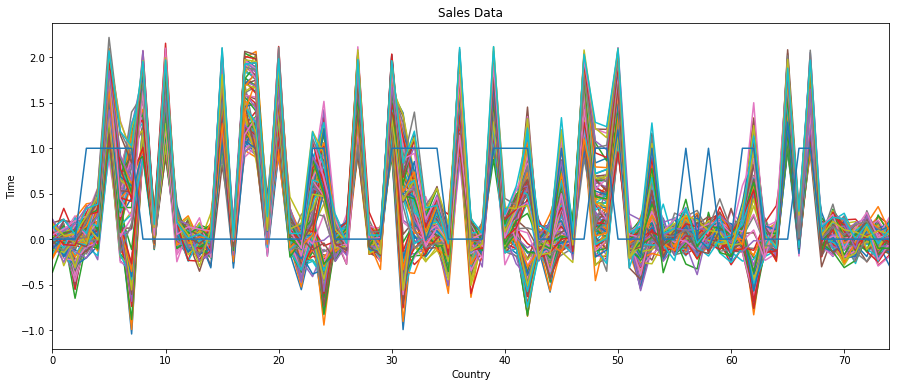

In [5]:
ax = data.loc[:, data.columns != 'Id'].plot(figsize = (15,6), title="Sales Data", legend = False)
ax.set(xlabel="Country", ylabel="Time")
plt.show()

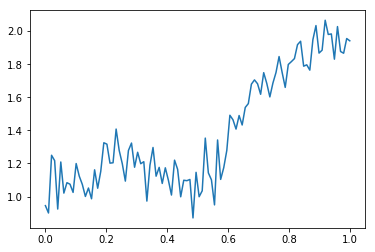

In [6]:
X = np.linspace(0,1,100)
Y = data.iloc[18,1:101].values
X = X[:, None]
Y = Y[:, None]
plt.plot(X,Y)

In [7]:
with pm.Model() as model:
    #  periodic component x 
    η_true  = pm.Normal("η_true", mu=0.1, sigma=3)
    ℓ_true  = pm.Normal("ℓ_true", mu=0.1, sigma=3)

    cov_seasonal = η_true**2 * pm.gp.cov.ExpQuad(1, ℓ_true) # Maybe change this to 100 since its 100 dimentions
    gp1 = pm.gp.Marginal(cov_func=cov_seasonal)

    #  linear component x 
    cov_linear = η_true**2 * pm.gp.cov.Matern32(1, ℓ_true) # Maybe change this to 100 since its 100 dimentions
    gp2 = pm.gp.Marginal(cov_func=cov_linear)

    # gp represents f1 + f2.
    gp = gp1 + gp2

    # noise model
    sigma = pm.HalfCauchy("sigma", beta=5, testval=0.1)
    f = gp.marginal_likelihood("f", X, Y[:,0], noise=sigma)

    # this line calls an optimizer to optimize the marginal likelihood
    mp = pm.find_MAP(include_transformed=True)

logp = 66.555, ||grad|| = 0.03297: 100%|██████████| 18/18 [00:00<00:00, 150.47it/s]  


In [8]:
#optimized parameters
sorted([name+":"+str(mp[name]) for name in mp.keys() if not name.endswith("_")])

['sigma:0.09646366589418474',
 'η_true:0.9217250135046413',
 'ℓ_true:0.7831299949373917']

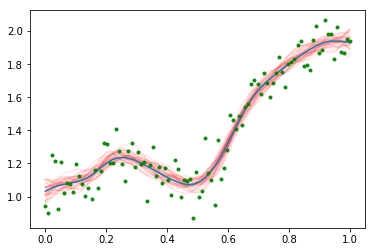

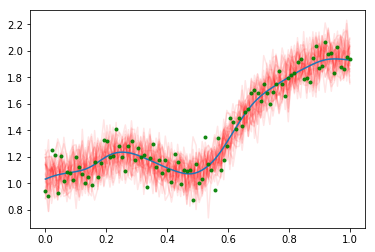

In [9]:
# 200 new values from x=0 to x=3
n_new = 100
X_new = np.linspace(0, 1, n_new)[:,None]

#periodic term
f1_pred = gp1.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma})
y1_pred = gp1.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma}, pred_noise=True)
#linear term
f2_pred = gp2.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma})
y2_pred = gp2.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma}, pred_noise=True)
#sum of periodic and linear term
y_pred  = gp.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma}, pred_noise=True)
f_pred  = gp.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma})

#we sample 10 regression lines from the posterior
sample_f = multivariate_normal(f_pred[0],f_pred[1]).rvs(30)

plt.plot(X_new[:,0],sample_f.T,color='red',alpha=0.1)# regression lines
plt.plot(X_new[:,0],f_pred[0])# this is the average line
plt.plot(X, Y, 'og', ms=3, alpha=0.9, label="Observed data", Zorder=1000);
plt.show()

#we sample 10 regression lines from the posterior
sample_y = multivariate_normal(y_pred[0],y_pred[1]).rvs(30)

plt.plot(X_new[:,0],sample_y.T,color='red',alpha=0.1)# regression lines
plt.plot(X_new[:,0],f_pred[0])# this is the average line
plt.plot(X, Y, 'og', ms=3, alpha=0.9, label="Observed data", Zorder=1000);
plt.show()

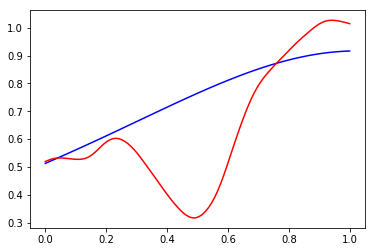

In [10]:
#we can recover the single components
plt.plot(X_new[:,0],f1_pred[0], color="blue")
plt.plot(X_new[:,0],f2_pred[0], color="red")

In [11]:
f2_pred[0]

array([0.51946469, 0.52392334, 0.52786946, 0.5305984 , 0.53195748,
       0.5322654 , 0.5316632 , 0.53053916, 0.52923668, 0.52807594,
       0.52732341, 0.52715397, 0.52802208, 0.53052087, 0.53512099,
       0.54194278, 0.55076178, 0.56093719, 0.57171043, 0.58202861,
       0.59079901, 0.59735818, 0.60143145, 0.60276904, 0.6011748 ,
       0.59694632, 0.59059285, 0.58245608, 0.57249989, 0.56078336,
       0.54762873, 0.53334316, 0.51835042, 0.50310973, 0.48798024,
       0.47277085, 0.45728032, 0.44165866, 0.42608674, 0.41077977,
       0.39586617, 0.38156849, 0.36804266, 0.35526444, 0.3435376 ,
       0.33340554, 0.32525785, 0.31950829, 0.31667294, 0.31723384,
       0.32119129, 0.32853167, 0.33900222, 0.35227466, 0.36862937,
       0.38849874, 0.41202221, 0.43877262, 0.46844223, 0.50038215,
       0.53356403, 0.56690758, 0.59975633, 0.63175629, 0.66258815,
       0.6919647 , 0.71946061, 0.7446406 , 0.76714602, 0.78692838,
       0.80427573, 0.81962756, 0.83338933, 0.84612299, 0.85833

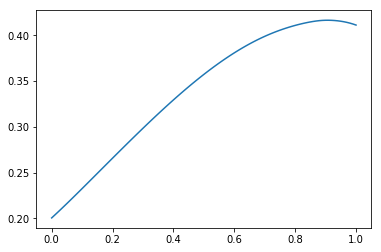

In [12]:
plt.plot(X_new[:,0],f2_pred[1][88])

In [13]:
def run_model(x_in, y_in, plot=False):
    with pm.Model() as model:
        #  periodic component x 
        η_true  = pm.Normal("η_true", mu=0.1, sigma=3)
        ℓ_true  = pm.Normal("ℓ_true", mu=0.1, sigma=3)

        cov_seasonal = η_true**2 * pm.gp.cov.ExpQuad(1, ℓ_true) # Maybe change this to 100 since its 100 dimentions
        gp1 = pm.gp.Marginal(cov_func=cov_seasonal)

        #  linear component x 
        cov_linear = η_true**2 * pm.gp.cov.Matern32(1, ℓ_true) # Maybe change this to 100 since its 100 dimentions
        gp2 = pm.gp.Marginal(cov_func=cov_linear)

        # gp represents f1 + f2.
        gp = gp1 + gp2

        # noise model
        sigma = pm.HalfCauchy("sigma", beta=5, testval=0.1)
        f = gp.marginal_likelihood("f", x_in, y_in[:,0], noise=sigma)

        # this line calls an optimizer to optimize the marginal likelihood
        mp = pm.find_MAP(include_transformed=True)

    # 200 new values from x=0 to x=3
    n_new = 100
    X_new = np.linspace(0, 1, n_new)[:,None]

    #periodic term
    f1_pred = gp1.predict(X_new, point=mp, given={"gp": gp, "X": x_in, "y": y_in[:,0], "noise": sigma})
    y1_pred = gp1.predict(X_new, point=mp, given={"gp": gp, "X": x_in, "y": y_in[:,0], "noise": sigma}, pred_noise=True)
    #linear term
    f2_pred = gp2.predict(X_new, point=mp, given={"gp": gp, "X": x_in, "y": y_in[:,0], "noise": sigma})
    y2_pred = gp2.predict(X_new, point=mp, given={"gp": gp, "X": x_in, "y": y_in[:,0], "noise": sigma}, pred_noise=True)
    #sum of periodic and linear term
    y_pred  = gp.predict(X_new, point=mp, given={"gp": gp, "X": x_in, "y": y_in[:,0], "noise": sigma}, pred_noise=True)
    f_pred  = gp.predict(X_new, point=mp, given={"gp": gp, "X": x_in, "y": y_in[:,0], "noise": sigma})
    
    posterior_probability_deriviative_is_positive = len(np.where(np.gradient(f2_pred[0],X_new[:,0])>0)[0])/len(f2_pred[0])
    
    print("Probability Sales Increasing is: ", posterior_probability_deriviative_is_positive)
    if posterior_probability_deriviative_is_positive>0.8:
        return 1
    else:
        return 0

In [14]:
test_df = pd.read_csv('./data/test.csv')
test_df.head()

,Id,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,0,1.050702,1.004361,0.880657,0.959512,1.014129,0.890916,0.986703,1.135940,1.223539,...,1.826883,1.797263,1.872348,1.926992,1.843073,1.958611,1.800846,1.867793,2.056990,2.060379
1,1,-0.042360,-0.134542,-0.093373,0.076402,-0.122659,-0.149690,-0.050888,0.087327,-0.003546,...,0.233283,0.265816,0.218283,0.134600,0.273861,0.056165,0.103871,0.099539,0.305985,0.294278
2,2,0.035063,0.050938,0.067512,0.117029,0.049060,-0.014029,0.079372,0.204120,0.002883,...,-0.005722,0.195326,0.169835,0.255006,0.211215,0.116720,0.162032,0.116356,0.305580,0.202131
3,3,-0.111408,-0.063093,-0.094206,-0.054800,-0.021415,0.083715,-0.032116,-0.158563,0.114007,...,0.074536,0.009352,-0.016270,-0.087119,0.007215,0.073824,-0.114334,0.008747,0.023304,-0.071806
4,4,0.977574,0.989015,1.243740,1.111227,1.288457,1.000790,1.052081,0.937450,0.999783,...,1.907418,1.892012,1.780125,1.899383,1.939521,1.896775,2.038367,2.071734,1.982058,2.023052


In [21]:
x = np.linspace(0,1,100)[:,None]
Decision = pd.DataFrame(columns=['Id','Category'])
for r in range(test_df.shape[0]):
    id_row = test_df.iloc[r,0]
    y = test_df.iloc[r,1:101].values[:,None]
    decision = run_model(x,y)
    Decision = Decision.append({'Id': int(id_row), 'Category': int(decision)}, ignore_index=True) 
    print(Decision)

Decision.to_csv('submission_1.csv')

logp = 70.088, ||grad|| = 0.016035: 100%|██████████| 25/25 [00:00<00:00, 538.99it/s]  


Probability Sales Increasing is:  1.0
  Id Category
0  0        1


logp = 79.029, ||grad|| = 0.27356: 100%|██████████| 15/15 [00:00<00:00, 476.16it/s]  


Probability Sales Increasing is:  0.75
  Id Category
0  0        1
1  1        0


logp = 81.088, ||grad|| = 12.25: 100%|██████████| 21/21 [00:00<00:00, 550.33it/s]  


Probability Sales Increasing is:  0.6
  Id Category
0  0        1
1  1        0
2  2        0


logp = 83.11, ||grad|| = 4.6177: 100%|██████████| 29/29 [00:00<00:00, 539.91it/s]   


Probability Sales Increasing is:  0.51
  Id Category
0  0        1
1  1        0
2  2        0
3  3        0


logp = 64.607, ||grad|| = 0.40017: 100%|██████████| 20/20 [00:00<00:00, 503.69it/s]  


Probability Sales Increasing is:  0.75
  Id Category
0  0        1
1  1        0
2  2        0
3  3        0
4  4        0


logp = 66.709, ||grad|| = 11.903: 100%|██████████| 19/19 [00:00<00:00, 565.96it/s]  


Probability Sales Increasing is:  0.57
  Id Category
0  0        1
1  1        0
2  2        0
3  3        0
4  4        0
5  5        0


logp = 72.839, ||grad|| = 0.48624: 100%|██████████| 17/17 [00:00<00:00, 562.75it/s]  


Probability Sales Increasing is:  0.8
  Id Category
0  0        1
1  1        0
2  2        0
3  3        0
4  4        0
5  5        0
6  6        0


logp = 81.506, ||grad|| = 0.19752: 100%|██████████| 26/26 [00:00<00:00, 502.31it/s]  


Probability Sales Increasing is:  0.98
  Id Category
0  0        1
1  1        0
2  2        0
3  3        0
4  4        0
5  5        0
6  6        0
7  7        1


logp = 75.192, ||grad|| = 0.00093609: 100%|██████████| 13/13 [00:00<00:00, 552.03it/s]  


Probability Sales Increasing is:  0.47
  Id Category
0  0        1
1  1        0
2  2        0
3  3        0
4  4        0
5  5        0
6  6        0
7  7        1
8  8        0


logp = 54.998, ||grad|| = 1.2991: 100%|██████████| 27/27 [00:00<00:00, 498.37it/s]  


Probability Sales Increasing is:  0.62
  Id Category
0  0        1
1  1        0
2  2        0
3  3        0
4  4        0
5  5        0
6  6        0
7  7        1
8  8        0
9  9        0


logp = 67.529, ||grad|| = 0.55685: 100%|██████████| 21/21 [00:00<00:00, 565.17it/s]  


Probability Sales Increasing is:  0.82
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1


logp = 70.225, ||grad|| = 0.12948: 100%|██████████| 18/18 [00:00<00:00, 533.63it/s]  


Probability Sales Increasing is:  1.0
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1


logp = 60.997, ||grad|| = 14.08: 100%|██████████| 20/20 [00:00<00:00, 549.49it/s]  


Probability Sales Increasing is:  0.53
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0


logp = 78.106, ||grad|| = 5.5721: 100%|██████████| 16/16 [00:00<00:00, 544.18it/s]  


Probability Sales Increasing is:  0.43
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0


logp = 66.433, ||grad|| = 0.0013202: 100%|██████████| 22/22 [00:00<00:00, 552.42it/s]  


Probability Sales Increasing is:  0.46
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0


logp = 83.522, ||grad|| = 1.3617: 100%|██████████| 29/29 [00:00<00:00, 567.53it/s]  


Probability Sales Increasing is:  0.95
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1


logp = 57.858, ||grad|| = 0.84049: 100%|██████████| 19/19 [00:00<00:00, 556.86it/s]  


Probability Sales Increasing is:  0.77
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0


logp = 68.784, ||grad|| = 0.0049116: 100%|██████████| 13/13 [00:00<00:00, 510.67it/s]  


Probability Sales Increasing is:  0.57
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0


logp = 73.61, ||grad|| = 0.20097: 100%|██████████| 14/14 [00:00<00:00, 532.95it/s]  


Probability Sales Increasing is:  0.52
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0


logp = 71.665, ||grad|| = 0.044518: 100%|██████████| 19/19 [00:00<00:00, 541.79it/s]  


Probability Sales Increasing is:  1.0
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1


logp = 71.057, ||grad|| = 5.9456e-05: 100%|██████████| 22/22 [00:00<00:00, 538.53it/s]  


Probability Sales Increasing is:  0.62
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0


logp = 67.511, ||grad|| = 30.582: 100%|██████████| 27/27 [00:00<00:00, 563.18it/s]  


Probability Sales Increasing is:  0.49
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0


logp = 77.291, ||grad|| = 26.935: 100%|██████████| 21/21 [00:00<00:00, 520.87it/s]  


Probability Sales Increasing is:  0.5
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0


logp = 61.696, ||grad|| = 0.00076236: 100%|██████████| 13/13 [00:00<00:00, 555.41it/s]  


Probability Sales Increasing is:  0.53
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0


logp = 66.086, ||grad|| = 0.007008: 100%|██████████| 13/13 [00:00<00:00, 607.84it/s]  


Probability Sales Increasing is:  0.49
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0


logp = 93.475, ||grad|| = 0.16638: 100%|██████████| 26/26 [00:00<00:00, 603.37it/s]  


Probability Sales Increasing is:  0.27
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0


logp = 64.687, ||grad|| = 0.012814: 100%|██████████| 13/13 [00:00<00:00, 589.20it/s]  


Probability Sales Increasing is:  0.52
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0


logp = 75.343, ||grad|| = 0.00044095: 100%|██████████| 22/22 [00:00<00:00, 591.28it/s]  


Probability Sales Increasing is:  0.88
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1


logp = 64.599, ||grad|| = 10.081: 100%|██████████| 20/20 [00:00<00:00, 603.24it/s]  


Probability Sales Increasing is:  0.53
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0


logp = 61.776, ||grad|| = 0.0058629: 100%|██████████| 24/24 [00:00<00:00, 593.81it/s]  


Probability Sales Increasing is:  1.0
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1


logp = 76.66, ||grad|| = 0.11049: 100%|██████████| 26/26 [00:00<00:00, 492.26it/s]  


Probability Sales Increasing is:  1.0
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1


logp = 73.407, ||grad|| = 0.096611: 100%|██████████| 18/18 [00:00<00:00, 529.46it/s]  


Probability Sales Increasing is:  0.91
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1


logp = 71.835, ||grad|| = 0.29674: 100%|██████████| 26/26 [00:00<00:00, 544.85it/s]  


Probability Sales Increasing is:  1.0
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1


logp = 61.755, ||grad|| = 0.016704: 100%|██████████| 26/26 [00:00<00:00, 528.90it/s]  


Probability Sales Increasing is:  1.0
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1


logp = 66.365, ||grad|| = 0.29754: 100%|██████████| 19/19 [00:00<00:00, 557.20it/s]  


Probability Sales Increasing is:  0.76
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1
34  34        0


logp = 58.664, ||grad|| = 0.019916: 100%|██████████| 25/25 [00:00<00:00, 459.42it/s]  


Probability Sales Increasing is:  1.0
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1
34  34        0
35  35        1


logp = 60.274, ||grad|| = 0.65628: 100%|██████████| 21/21 [00:00<00:00, 565.92it/s]  


Probability Sales Increasing is:  0.72
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1
34  34        0
35  35        1
36  36        0


logp = 76.007, ||grad|| = 0.0031595: 100%|██████████| 13/13 [00:00<00:00, 529.83it/s]  


Probability Sales Increasing is:  0.47
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1
34  34        0
35  35        1
36  36        0
37  37        0


logp = 70.802, ||grad|| = 0.44748: 100%|██████████| 19/19 [00:00<00:00, 546.85it/s]  


Probability Sales Increasing is:  0.7
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1
34  34        0
35  35        1
36  36        0
37  37        0
38  38        0


logp = 80.273, ||grad|| = 5.271: 100%|██████████| 18/18 [00:00<00:00, 515.57it/s]  


Probability Sales Increasing is:  0.65
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1
34  34        0
35  35        1
36  36        0
37  37        0
38  38        0
39  39        0


logp = 76.215, ||grad|| = 0.062981: 100%|██████████| 26/26 [00:00<00:00, 553.16it/s]  


Probability Sales Increasing is:  1.0
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1
34  34        0
35  35        1
36  36        0
37  37        0
38  38        0
39  39        0
40  40        1


logp = 80.982, ||grad|| = 0.28967: 100%|██████████| 26/26 [00:00<00:00, 554.57it/s]  


Probability Sales Increasing is:  0.78
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1
34  34        0
35  35        1
36  36        0
37  37        0
38  38        0
39  39        0
40  40        1
41  41        0


logp = 82.092, ||grad|| = 0.072551: 100%|██████████| 14/14 [00:00<00:00, 535.85it/s]  


Probability Sales Increasing is:  0.68
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1
34  34        0
35  35        1
36  36        0
37  37        0
38  38        0
39  39        0
40  40        1
41  41        0
42  42        0


logp = 79.489, ||grad|| = 0.016691: 100%|██████████| 13/13 [00:00<00:00, 539.42it/s]  


Probability Sales Increasing is:  0.58
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1
34  34        0
35  35        1
36  36        0
37  37        0
38  38        0
39  39        0
40  40        1
41  41        0
42  42        0
43  43        0


logp = 49.984, ||grad|| = 12.861: 100%|██████████| 21/21 [00:00<00:00, 576.60it/s]  


Probability Sales Increasing is:  0.5
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1
34  34        0
35  35        1
36  36        0
37  37        0
38  38        0
39  39        0
40  40        1
41  41        0
42  42        0
43  43        0
44  44        0


logp = 71.447, ||grad|| = 0.40535: 100%|██████████| 20/20 [00:00<00:00, 538.10it/s]  


Probability Sales Increasing is:  0.7
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1
34  34        0
35  35        1
36  36        0
37  37        0
38  38        0
39  39        0
40  40        1
41  41        0
42  42        0
43  43        0
44  44        0
45  45        0


logp = 65.273, ||grad|| = 0.0037152: 100%|██████████| 13/13 [00:00<00:00, 552.11it/s]  


Probability Sales Increasing is:  0.55
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1
34  34        0
35  35        1
36  36        0
37  37        0
38  38        0
39  39        0
40  40        1
41  41        0
42  42        0
43  43        0
44  44        0
45  45        0
46  46        0


logp = 77.895, ||grad|| = 1.7172: 100%|██████████| 21/21 [00:00<00:00, 565.76it/s]  


Probability Sales Increasing is:  0.78
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1
34  34        0
35  35        1
36  36        0
37  37        0
38  38        0
39  39        0
40  40        1
41  41        0
42  42        0
43  43        0
44  44        0
45  45        0
46  46        0
47  47        0


logp = 71.828, ||grad|| = 3.1284: 100%|██████████| 20/20 [00:00<00:00, 561.56it/s]  


Probability Sales Increasing is:  0.68
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1
34  34        0
35  35        1
36  36        0
37  37        0
38  38        0
39  39        0
40  40        1
41  41        0
42  42        0
43  43        0
44  44        0
45  45        0
46  46        0
47  47        0
48  48        0


logp = 67.24, ||grad|| = 1.0663: 100%|██████████| 19/19 [00:00<00:00, 541.52it/s]  


Probability Sales Increasing is:  0.84
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1
34  34        0
35  35        1
36  36        0
37  37        0
38  38        0
39  39        0
40  40        1
41  41        0
42  42        0
43  43        0
44  44        0
45  45        0
46  46        0
47  47        0
48  48        0
49  49        1


logp = 57.775, ||grad|| = 5.1411: 100%|██████████| 28/28 [00:00<00:00, 553.12it/s]  


Probability Sales Increasing is:  0.64
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1
34  34        0
35  35        1
36  36        0
37  37        0
38  38        0
39  39        0
40  40        1
41  41        0
42  42        0
43  43        0
44  44        0
45  45        0
46  46        0
47  47        0
48  48        0
49  49        1
50  50        0


logp = 60.677, ||grad|| = 0.0091052: 100%|██████████| 24/24 [00:00<00:00, 492.60it/s]  


Probability Sales Increasing is:  0.79
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1
34  34        0
35  35        1
36  36        0
37  37        0
38  38        0
39  39        0
40  40        1
41  41        0
42  42        0
43  43        0
44  44        0
45  45        0
46  46        0
47  47        0
48  48        0
49  49        1
50  50        0
51  51        0


logp = 72.821, ||grad|| = 0.089286: 100%|██████████| 15/15 [00:00<00:00, 541.32it/s]  


Probability Sales Increasing is:  0.76
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1
34  34        0
35  35        1
36  36        0
37  37        0
38  38        0
39  39        0
40  40        1
41  41        0
42  42        0
43  43        0
44  44        0
45  45        0
46  46        0
47  47        0
48  48        0
49  49        1
50  50        0
51  51        0
52  52        0


logp = 90.833, ||grad|| = 0.0009267: 100%|██████████| 22/22 [00:00<00:00, 584.19it/s]  


Probability Sales Increasing is:  1.0
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1
34  34        0
35  35        1
36  36        0
37  37        0
38  38        0
39  39        0
40  40        1
41  41        0
42  42        0
43  43        0
44  44        0
45  45        0
46  46        0
47  47        0
48  48        0
49  49        1
50  50        0
51  51        0
52  52        0
53  53        1


logp = 43.798, ||grad|| = 0.081703: 100%|██████████| 25/25 [00:00<00:00, 587.02it/s]  


Probability Sales Increasing is:  0.58
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1
34  34        0
35  35        1
36  36        0
37  37        0
38  38        0
39  39        0
40  40        1
41  41        0
42  42        0
43  43        0
44  44        0
45  45        0
46  46        0
47  47        0
48  48        0
49  49        1
50  50        0
51  51        0
52  52        0
53  53        1
54  54        0


logp = 86.218, ||grad|| = 0.065569: 100%|██████████| 14/14 [00:00<00:00, 600.71it/s]  


Probability Sales Increasing is:  0.47
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1
34  34        0
35  35        1
36  36        0
37  37        0
38  38        0
39  39        0
40  40        1
41  41        0
42  42        0
43  43        0
44  44        0
45  45        0
46  46        0
47  47        0
48  48        0
49  49        1
50  50        0
51  51        0
52  52        0
53  53        1
54  54        0
55  55        0


logp = 63.837, ||grad|| = 0.012047: 100%|██████████| 13/13 [00:00<00:00, 566.77it/s]  


Probability Sales Increasing is:  0.59
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1
34  34        0
35  35        1
36  36        0
37  37        0
38  38        0
39  39        0
40  40        1
41  41        0
42  42        0
43  43        0
44  44        0
45  45        0
46  46        0
47  47        0
48  48        0
49  49        1
50  50        0
51  51        0
52  52        0
53  53        1
54  54        0
55  55        0
56  56        0


logp = 66.903, ||grad|| = 0.25004: 100%|██████████| 16/16 [00:00<00:00, 545.68it/s]  


Probability Sales Increasing is:  0.47
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1
34  34        0
35  35        1
36  36        0
37  37        0
38  38        0
39  39        0
40  40        1
41  41        0
42  42        0
43  43        0
44  44        0
45  45        0
46  46        0
47  47        0
48  48        0
49  49        1
50  50        0
51  51        0
52  52        0
53  53        1
54  54        0
55  55        0
56  56        0
57  57        0


logp = 69.196, ||grad|| = 0.80881: 100%|██████████| 21/21 [00:00<00:00, 614.59it/s]  


Probability Sales Increasing is:  0.7
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1
34  34        0
35  35        1
36  36        0
37  37        0
38  38        0
39  39        0
40  40        1
41  41        0
42  42        0
43  43        0
44  44        0
45  45        0
46  46        0
47  47        0
48  48        0
49  49        1
50  50        0
51  51        0
52  52        0
53  53        1
54  54        0
55  55        0
56  56        0
57  57        0
58  58        0


logp = 65.894, ||grad|| = 0.27202: 100%|██████████| 20/20 [00:00<00:00, 622.12it/s]  


Probability Sales Increasing is:  0.72
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
30  30        1
31  31        1
32  32        1
33  33        1
34  34        0
35  35        1
36  36        0
37  37        0
38  38        0
39  39        0
40  40        1
41  41        0
42  42        0
43  43        0
44  44        0
45  45        0
46  46        0
47  47        0
48  48        0
49  49        1
50  50        0
51  51        0
52  52        0
53  53        1
54  54        0
55  55        0
56  56        0
57  57        0
58  58        0
5

logp = 72.459, ||grad|| = 0.56107: 100%|██████████| 19/19 [00:00<00:00, 575.25it/s]  


Probability Sales Increasing is:  1.0
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
31  31        1
32  32        1
33  33        1
34  34        0
35  35        1
36  36        0
37  37        0
38  38        0
39  39        0
40  40        1
41  41        0
42  42        0
43  43        0
44  44        0
45  45        0
46  46        0
47  47        0
48  48        0
49  49        1
50  50        0
51  51        0
52  52        0
53  53        1
54  54        0
55  55        0
56  56        0
57  57        0
58  58        0
59

logp = 51.066, ||grad|| = 0.0044444: 100%|██████████| 23/23 [00:00<00:00, 565.90it/s]  


Probability Sales Increasing is:  0.57
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
32  32        1
33  33        1
34  34        0
35  35        1
36  36        0
37  37        0
38  38        0
39  39        0
40  40        1
41  41        0
42  42        0
43  43        0
44  44        0
45  45        0
46  46        0
47  47        0
48  48        0
49  49        1
50  50        0
51  51        0
52  52        0
53  53        1
54  54        0
55  55        0
56  56        0
57  57        0
58  58        0
59  59        0
6

logp = 67.254, ||grad|| = 0.23029: 100%|██████████| 16/16 [00:00<00:00, 592.13it/s]  


Probability Sales Increasing is:  0.54
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
33  33        1
34  34        0
35  35        1
36  36        0
37  37        0
38  38        0
39  39        0
40  40        1
41  41        0
42  42        0
43  43        0
44  44        0
45  45        0
46  46        0
47  47        0
48  48        0
49  49        1
50  50        0
51  51        0
52  52        0
53  53        1
54  54        0
55  55        0
56  56        0
57  57        0
58  58        0
59  59        0
60  60        1
6

logp = 88, ||grad|| = 10.549: 100%|██████████| 31/31 [00:00<00:00, 618.03it/s]      


Probability Sales Increasing is:  0.97
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
34  34        0
35  35        1
36  36        0
37  37        0
38  38        0
39  39        0
40  40        1
41  41        0
42  42        0
43  43        0
44  44        0
45  45        0
46  46        0
47  47        0
48  48        0
49  49        1
50  50        0
51  51        0
52  52        0
53  53        1
54  54        0
55  55        0
56  56        0
57  57        0
58  58        0
59  59        0
60  60        1
61  61        0
6

logp = 82.921, ||grad|| = 0.10402: 100%|██████████| 24/24 [00:00<00:00, 583.17it/s]  


Probability Sales Increasing is:  0.94
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
35  35        1
36  36        0
37  37        0
38  38        0
39  39        0
40  40        1
41  41        0
42  42        0
43  43        0
44  44        0
45  45        0
46  46        0
47  47        0
48  48        0
49  49        1
50  50        0
51  51        0
52  52        0
53  53        1
54  54        0
55  55        0
56  56        0
57  57        0
58  58        0
59  59        0
60  60        1
61  61        0
62  62        0
6

logp = 57.162, ||grad|| = 0.021661: 100%|██████████| 24/24 [00:00<00:00, 568.74it/s]  


Probability Sales Increasing is:  0.57
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
36  36        0
37  37        0
38  38        0
39  39        0
40  40        1
41  41        0
42  42        0
43  43        0
44  44        0
45  45        0
46  46        0
47  47        0
48  48        0
49  49        1
50  50        0
51  51        0
52  52        0
53  53        1
54  54        0
55  55        0
56  56        0
57  57        0
58  58        0
59  59        0
60  60        1
61  61        0
62  62        0
63  63        1
6

logp = 71.958, ||grad|| = 0.15978: 100%|██████████| 15/15 [00:00<00:00, 560.08it/s]  


Probability Sales Increasing is:  0.69
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
37  37        0
38  38        0
39  39        0
40  40        1
41  41        0
42  42        0
43  43        0
44  44        0
45  45        0
46  46        0
47  47        0
48  48        0
49  49        1
50  50        0
51  51        0
52  52        0
53  53        1
54  54        0
55  55        0
56  56        0
57  57        0
58  58        0
59  59        0
60  60        1
61  61        0
62  62        0
63  63        1
64  64        1
6

logp = 57.116, ||grad|| = 1.9725: 100%|██████████| 18/18 [00:00<00:00, 589.51it/s]  


Probability Sales Increasing is:  0.61
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
38  38        0
39  39        0
40  40        1
41  41        0
42  42        0
43  43        0
44  44        0
45  45        0
46  46        0
47  47        0
48  48        0
49  49        1
50  50        0
51  51        0
52  52        0
53  53        1
54  54        0
55  55        0
56  56        0
57  57        0
58  58        0
59  59        0
60  60        1
61  61        0
62  62        0
63  63        1
64  64        1
65  65        0
6

logp = 77.571, ||grad|| = 0.12383: 100%|██████████| 24/24 [00:00<00:00, 588.44it/s]  


Probability Sales Increasing is:  0.46
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
39  39        0
40  40        1
41  41        0
42  42        0
43  43        0
44  44        0
45  45        0
46  46        0
47  47        0
48  48        0
49  49        1
50  50        0
51  51        0
52  52        0
53  53        1
54  54        0
55  55        0
56  56        0
57  57        0
58  58        0
59  59        0
60  60        1
61  61        0
62  62        0
63  63        1
64  64        1
65  65        0
66  66        0
6

logp = 61.966, ||grad|| = 0.62011: 100%|██████████| 20/20 [00:00<00:00, 611.10it/s]  


Probability Sales Increasing is:  0.69
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
40  40        1
41  41        0
42  42        0
43  43        0
44  44        0
45  45        0
46  46        0
47  47        0
48  48        0
49  49        1
50  50        0
51  51        0
52  52        0
53  53        1
54  54        0
55  55        0
56  56        0
57  57        0
58  58        0
59  59        0
60  60        1
61  61        0
62  62        0
63  63        1
64  64        1
65  65        0
66  66        0
67  67        0
6

logp = 61.73, ||grad|| = 0.50891: 100%|██████████| 21/21 [00:00<00:00, 561.14it/s]  


Probability Sales Increasing is:  0.72
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
41  41        0
42  42        0
43  43        0
44  44        0
45  45        0
46  46        0
47  47        0
48  48        0
49  49        1
50  50        0
51  51        0
52  52        0
53  53        1
54  54        0
55  55        0
56  56        0
57  57        0
58  58        0
59  59        0
60  60        1
61  61        0
62  62        0
63  63        1
64  64        1
65  65        0
66  66        0
67  67        0
68  68        0
6

logp = 73.5, ||grad|| = 0.091234: 100%|██████████| 27/27 [00:00<00:00, 598.70it/s]  


Probability Sales Increasing is:  0.87
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
42  42        0
43  43        0
44  44        0
45  45        0
46  46        0
47  47        0
48  48        0
49  49        1
50  50        0
51  51        0
52  52        0
53  53        1
54  54        0
55  55        0
56  56        0
57  57        0
58  58        0
59  59        0
60  60        1
61  61        0
62  62        0
63  63        1
64  64        1
65  65        0
66  66        0
67  67        0
68  68        0
69  69        0
7

logp = 77.879, ||grad|| = 2.584: 100%|██████████| 30/30 [00:00<00:00, 593.86it/s]   


Probability Sales Increasing is:  0.31
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
43  43        0
44  44        0
45  45        0
46  46        0
47  47        0
48  48        0
49  49        1
50  50        0
51  51        0
52  52        0
53  53        1
54  54        0
55  55        0
56  56        0
57  57        0
58  58        0
59  59        0
60  60        1
61  61        0
62  62        0
63  63        1
64  64        1
65  65        0
66  66        0
67  67        0
68  68        0
69  69        0
70  70        0
7

logp = 72.483, ||grad|| = 0.42485: 100%|██████████| 15/15 [00:00<00:00, 562.30it/s]  


Probability Sales Increasing is:  0.6
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
44  44        0
45  45        0
46  46        0
47  47        0
48  48        0
49  49        1
50  50        0
51  51        0
52  52        0
53  53        1
54  54        0
55  55        0
56  56        0
57  57        0
58  58        0
59  59        0
60  60        1
61  61        0
62  62        0
63  63        1
64  64        1
65  65        0
66  66        0
67  67        0
68  68        0
69  69        0
70  70        0
71  71        1
72

logp = 77.718, ||grad|| = 3.1721: 100%|██████████| 21/21 [00:00<00:00, 603.47it/s]  


Probability Sales Increasing is:  0.56
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
45  45        0
46  46        0
47  47        0
48  48        0
49  49        1
50  50        0
51  51        0
52  52        0
53  53        1
54  54        0
55  55        0
56  56        0
57  57        0
58  58        0
59  59        0
60  60        1
61  61        0
62  62        0
63  63        1
64  64        1
65  65        0
66  66        0
67  67        0
68  68        0
69  69        0
70  70        0
71  71        1
72  72        0
7

logp = 55.194, ||grad|| = 7.1715: 100%|██████████| 19/19 [00:00<00:00, 587.26it/s]  


Probability Sales Increasing is:  0.6
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
46  46        0
47  47        0
48  48        0
49  49        1
50  50        0
51  51        0
52  52        0
53  53        1
54  54        0
55  55        0
56  56        0
57  57        0
58  58        0
59  59        0
60  60        1
61  61        0
62  62        0
63  63        1
64  64        1
65  65        0
66  66        0
67  67        0
68  68        0
69  69        0
70  70        0
71  71        1
72  72        0
73  73        0
74

logp = 59.172, ||grad|| = 0.11636: 100%|██████████| 20/20 [00:00<00:00, 522.86it/s]  


Probability Sales Increasing is:  0.7
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
47  47        0
48  48        0
49  49        1
50  50        0
51  51        0
52  52        0
53  53        1
54  54        0
55  55        0
56  56        0
57  57        0
58  58        0
59  59        0
60  60        1
61  61        0
62  62        0
63  63        1
64  64        1
65  65        0
66  66        0
67  67        0
68  68        0
69  69        0
70  70        0
71  71        1
72  72        0
73  73        0
74  74        0
75

logp = 77.381, ||grad|| = 21.464: 100%|██████████| 19/19 [00:00<00:00, 518.87it/s]  


Probability Sales Increasing is:  0.52
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
48  48        0
49  49        1
50  50        0
51  51        0
52  52        0
53  53        1
54  54        0
55  55        0
56  56        0
57  57        0
58  58        0
59  59        0
60  60        1
61  61        0
62  62        0
63  63        1
64  64        1
65  65        0
66  66        0
67  67        0
68  68        0
69  69        0
70  70        0
71  71        1
72  72        0
73  73        0
74  74        0
75  75        0
7

logp = 82.305, ||grad|| = 1.2624: 100%|██████████| 20/20 [00:00<00:00, 570.08it/s]  


Probability Sales Increasing is:  0.76
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
49  49        1
50  50        0
51  51        0
52  52        0
53  53        1
54  54        0
55  55        0
56  56        0
57  57        0
58  58        0
59  59        0
60  60        1
61  61        0
62  62        0
63  63        1
64  64        1
65  65        0
66  66        0
67  67        0
68  68        0
69  69        0
70  70        0
71  71        1
72  72        0
73  73        0
74  74        0
75  75        0
76  76        0
7

logp = 65.947, ||grad|| = 0.12327: 100%|██████████| 15/15 [00:00<00:00, 522.96it/s]  


Probability Sales Increasing is:  0.61
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
50  50        0
51  51        0
52  52        0
53  53        1
54  54        0
55  55        0
56  56        0
57  57        0
58  58        0
59  59        0
60  60        1
61  61        0
62  62        0
63  63        1
64  64        1
65  65        0
66  66        0
67  67        0
68  68        0
69  69        0
70  70        0
71  71        1
72  72        0
73  73        0
74  74        0
75  75        0
76  76        0
77  77        0
7

logp = 54.116, ||grad|| = 16.154: 100%|██████████| 20/20 [00:00<00:00, 555.05it/s]  


Probability Sales Increasing is:  0.51
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
51  51        0
52  52        0
53  53        1
54  54        0
55  55        0
56  56        0
57  57        0
58  58        0
59  59        0
60  60        1
61  61        0
62  62        0
63  63        1
64  64        1
65  65        0
66  66        0
67  67        0
68  68        0
69  69        0
70  70        0
71  71        1
72  72        0
73  73        0
74  74        0
75  75        0
76  76        0
77  77        0
78  78        0
7

logp = 63.845, ||grad|| = 0.00088728: 100%|██████████| 22/22 [00:00<00:00, 539.44it/s]  


Probability Sales Increasing is:  0.8
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
52  52        0
53  53        1
54  54        0
55  55        0
56  56        0
57  57        0
58  58        0
59  59        0
60  60        1
61  61        0
62  62        0
63  63        1
64  64        1
65  65        0
66  66        0
67  67        0
68  68        0
69  69        0
70  70        0
71  71        1
72  72        0
73  73        0
74  74        0
75  75        0
76  76        0
77  77        0
78  78        0
79  79        0
80

logp = 73.29, ||grad|| = 0.12412: 100%|██████████| 25/25 [00:00<00:00, 539.67it/s]  


Probability Sales Increasing is:  1.0
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
53  53        1
54  54        0
55  55        0
56  56        0
57  57        0
58  58        0
59  59        0
60  60        1
61  61        0
62  62        0
63  63        1
64  64        1
65  65        0
66  66        0
67  67        0
68  68        0
69  69        0
70  70        0
71  71        1
72  72        0
73  73        0
74  74        0
75  75        0
76  76        0
77  77        0
78  78        0
79  79        0
80  80        0
81

logp = 43.673, ||grad|| = 0.95655: 100%|██████████| 26/26 [00:00<00:00, 516.50it/s]  


Probability Sales Increasing is:  0.55
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
54  54        0
55  55        0
56  56        0
57  57        0
58  58        0
59  59        0
60  60        1
61  61        0
62  62        0
63  63        1
64  64        1
65  65        0
66  66        0
67  67        0
68  68        0
69  69        0
70  70        0
71  71        1
72  72        0
73  73        0
74  74        0
75  75        0
76  76        0
77  77        0
78  78        0
79  79        0
80  80        0
81  81        0
8

logp = 82.668, ||grad|| = 20.685: 100%|██████████| 17/17 [00:00<00:00, 529.48it/s]  


Probability Sales Increasing is:  0.52
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
55  55        0
56  56        0
57  57        0
58  58        0
59  59        0
60  60        1
61  61        0
62  62        0
63  63        1
64  64        1
65  65        0
66  66        0
67  67        0
68  68        0
69  69        0
70  70        0
71  71        1
72  72        0
73  73        0
74  74        0
75  75        0
76  76        0
77  77        0
78  78        0
79  79        0
80  80        0
81  81        0
82  82        1
8

logp = 76.087, ||grad|| = 19.73: 100%|██████████| 18/18 [00:00<00:00, 558.71it/s]  


Probability Sales Increasing is:  0.44
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
56  56        0
57  57        0
58  58        0
59  59        0
60  60        1
61  61        0
62  62        0
63  63        1
64  64        1
65  65        0
66  66        0
67  67        0
68  68        0
69  69        0
70  70        0
71  71        1
72  72        0
73  73        0
74  74        0
75  75        0
76  76        0
77  77        0
78  78        0
79  79        0
80  80        0
81  81        0
82  82        1
83  83        0
8

logp = 83.789, ||grad|| = 0.68673: 100%|██████████| 27/27 [00:00<00:00, 566.99it/s]  


Probability Sales Increasing is:  0.79
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
57  57        0
58  58        0
59  59        0
60  60        1
61  61        0
62  62        0
63  63        1
64  64        1
65  65        0
66  66        0
67  67        0
68  68        0
69  69        0
70  70        0
71  71        1
72  72        0
73  73        0
74  74        0
75  75        0
76  76        0
77  77        0
78  78        0
79  79        0
80  80        0
81  81        0
82  82        1
83  83        0
84  84        0
8

logp = 75.834, ||grad|| = 0.00056672: 100%|██████████| 22/22 [00:00<00:00, 551.81it/s]  


Probability Sales Increasing is:  0.5
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
58  58        0
59  59        0
60  60        1
61  61        0
62  62        0
63  63        1
64  64        1
65  65        0
66  66        0
67  67        0
68  68        0
69  69        0
70  70        0
71  71        1
72  72        0
73  73        0
74  74        0
75  75        0
76  76        0
77  77        0
78  78        0
79  79        0
80  80        0
81  81        0
82  82        1
83  83        0
84  84        0
85  85        0
86

logp = 61.697, ||grad|| = 0.00020881: 100%|██████████| 22/22 [00:00<00:00, 521.88it/s]  


Probability Sales Increasing is:  0.78
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
59  59        0
60  60        1
61  61        0
62  62        0
63  63        1
64  64        1
65  65        0
66  66        0
67  67        0
68  68        0
69  69        0
70  70        0
71  71        1
72  72        0
73  73        0
74  74        0
75  75        0
76  76        0
77  77        0
78  78        0
79  79        0
80  80        0
81  81        0
82  82        1
83  83        0
84  84        0
85  85        0
86  86        0
8

logp = 42.189, ||grad|| = 4.2626: 100%|██████████| 27/27 [00:00<00:00, 531.67it/s]  


Probability Sales Increasing is:  0.53
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
60  60        1
61  61        0
62  62        0
63  63        1
64  64        1
65  65        0
66  66        0
67  67        0
68  68        0
69  69        0
70  70        0
71  71        1
72  72        0
73  73        0
74  74        0
75  75        0
76  76        0
77  77        0
78  78        0
79  79        0
80  80        0
81  81        0
82  82        1
83  83        0
84  84        0
85  85        0
86  86        0
87  87        0
8

logp = 89.097, ||grad|| = 0.017121: 100%|██████████| 22/22 [00:00<00:00, 567.99it/s]  


Probability Sales Increasing is:  0.31
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
61  61        0
62  62        0
63  63        1
64  64        1
65  65        0
66  66        0
67  67        0
68  68        0
69  69        0
70  70        0
71  71        1
72  72        0
73  73        0
74  74        0
75  75        0
76  76        0
77  77        0
78  78        0
79  79        0
80  80        0
81  81        0
82  82        1
83  83        0
84  84        0
85  85        0
86  86        0
87  87        0
88  88        0
8

logp = 76.396, ||grad|| = 0.060103: 100%|██████████| 19/19 [00:00<00:00, 553.90it/s]  


Probability Sales Increasing is:  1.0
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
62  62        0
63  63        1
64  64        1
65  65        0
66  66        0
67  67        0
68  68        0
69  69        0
70  70        0
71  71        1
72  72        0
73  73        0
74  74        0
75  75        0
76  76        0
77  77        0
78  78        0
79  79        0
80  80        0
81  81        0
82  82        1
83  83        0
84  84        0
85  85        0
86  86        0
87  87        0
88  88        0
89  89        0
90

logp = 70.201, ||grad|| = 1.0297: 100%|██████████| 25/25 [00:00<00:00, 542.17it/s]  


Probability Sales Increasing is:  0.72
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
63  63        1
64  64        1
65  65        0
66  66        0
67  67        0
68  68        0
69  69        0
70  70        0
71  71        1
72  72        0
73  73        0
74  74        0
75  75        0
76  76        0
77  77        0
78  78        0
79  79        0
80  80        0
81  81        0
82  82        1
83  83        0
84  84        0
85  85        0
86  86        0
87  87        0
88  88        0
89  89        0
90  90        0
9

logp = 91.505, ||grad|| = 0.20968: 100%|██████████| 19/19 [00:00<00:00, 584.51it/s]  


Probability Sales Increasing is:  0.81
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
64  64        1
65  65        0
66  66        0
67  67        0
68  68        0
69  69        0
70  70        0
71  71        1
72  72        0
73  73        0
74  74        0
75  75        0
76  76        0
77  77        0
78  78        0
79  79        0
80  80        0
81  81        0
82  82        1
83  83        0
84  84        0
85  85        0
86  86        0
87  87        0
88  88        0
89  89        0
90  90        0
91  91        1
9

logp = 73.457, ||grad|| = 0.10563: 100%|██████████| 25/25 [00:00<00:00, 532.84it/s]  


Probability Sales Increasing is:  0.84
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
65  65        0
66  66        0
67  67        0
68  68        0
69  69        0
70  70        0
71  71        1
72  72        0
73  73        0
74  74        0
75  75        0
76  76        0
77  77        0
78  78        0
79  79        0
80  80        0
81  81        0
82  82        1
83  83        0
84  84        0
85  85        0
86  86        0
87  87        0
88  88        0
89  89        0
90  90        0
91  91        1
92  92        0
9

logp = 70.798, ||grad|| = 2.5678: 100%|██████████| 18/18 [00:00<00:00, 524.08it/s]  


Probability Sales Increasing is:  0.54
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
66  66        0
67  67        0
68  68        0
69  69        0
70  70        0
71  71        1
72  72        0
73  73        0
74  74        0
75  75        0
76  76        0
77  77        0
78  78        0
79  79        0
80  80        0
81  81        0
82  82        1
83  83        0
84  84        0
85  85        0
86  86        0
87  87        0
88  88        0
89  89        0
90  90        0
91  91        1
92  92        0
93  93        1
9

logp = 76.361, ||grad|| = 0.041442: 100%|██████████| 16/16 [00:00<00:00, 526.47it/s]  


Probability Sales Increasing is:  0.59
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
67  67        0
68  68        0
69  69        0
70  70        0
71  71        1
72  72        0
73  73        0
74  74        0
75  75        0
76  76        0
77  77        0
78  78        0
79  79        0
80  80        0
81  81        0
82  82        1
83  83        0
84  84        0
85  85        0
86  86        0
87  87        0
88  88        0
89  89        0
90  90        0
91  91        1
92  92        0
93  93        1
94  94        1
9

logp = 66.162, ||grad|| = 1.1911: 100%|██████████| 26/26 [00:00<00:00, 548.20it/s]  


Probability Sales Increasing is:  0.6
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
68  68        0
69  69        0
70  70        0
71  71        1
72  72        0
73  73        0
74  74        0
75  75        0
76  76        0
77  77        0
78  78        0
79  79        0
80  80        0
81  81        0
82  82        1
83  83        0
84  84        0
85  85        0
86  86        0
87  87        0
88  88        0
89  89        0
90  90        0
91  91        1
92  92        0
93  93        1
94  94        1
95  95        0
96

logp = 84.094, ||grad|| = 2.2893: 100%|██████████| 18/18 [00:00<00:00, 547.81it/s]  


Probability Sales Increasing is:  0.79
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
69  69        0
70  70        0
71  71        1
72  72        0
73  73        0
74  74        0
75  75        0
76  76        0
77  77        0
78  78        0
79  79        0
80  80        0
81  81        0
82  82        1
83  83        0
84  84        0
85  85        0
86  86        0
87  87        0
88  88        0
89  89        0
90  90        0
91  91        1
92  92        0
93  93        1
94  94        1
95  95        0
96  96        0
9

logp = 77.635, ||grad|| = 0.0006582: 100%|██████████| 24/24 [00:00<00:00, 538.41it/s]  


Probability Sales Increasing is:  1.0
    Id Category
0    0        1
1    1        0
2    2        0
3    3        0
4    4        0
5    5        0
6    6        0
7    7        1
8    8        0
9    9        0
10  10        1
11  11        1
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        0
18  18        0
19  19        1
20  20        0
21  21        0
22  22        0
23  23        0
24  24        0
25  25        0
26  26        0
27  27        1
28  28        0
29  29        1
..  ..      ...
70  70        0
71  71        1
72  72        0
73  73        0
74  74        0
75  75        0
76  76        0
77  77        0
78  78        0
79  79        0
80  80        0
81  81        0
82  82        1
83  83        0
84  84        0
85  85        0
86  86        0
87  87        0
88  88        0
89  89        0
90  90        0
91  91        1
92  92        0
93  93        1
94  94        1
95  95        0
96  96        0
97  97        0
98

logp = 54.595, ||grad|| = 19.709: 100%|██████████| 21/21 [00:00<00:00, 536.59it/s]  


Probability Sales Increasing is:  0.54
      Id Category
0      0        1
1      1        0
2      2        0
3      3        0
4      4        0
5      5        0
6      6        0
7      7        1
8      8        0
9      9        0
10    10        1
11    11        1
12    12        0
13    13        0
14    14        0
15    15        1
16    16        0
17    17        0
18    18        0
19    19        1
20    20        0
21    21        0
22    22        0
23    23        0
24    24        0
25    25        0
26    26        0
27    27        1
28    28        0
29    29        1
..   ...      ...
71    71        1
72    72        0
73    73        0
74    74        0
75    75        0
76    76        0
77    77        0
78    78        0
79    79        0
80    80        0
81    81        0
82    82        1
83    83        0
84    84        0
85    85        0
86    86        0
87    87        0
88    88        0
89    89        0
90    90        0
91    91        1
92    9

logp = 66.155, ||grad|| = 0.013395: 100%|██████████| 13/13 [00:00<00:00, 608.98it/s]  


Probability Sales Increasing is:  0.47
      Id Category
0      0        1
1      1        0
2      2        0
3      3        0
4      4        0
5      5        0
6      6        0
7      7        1
8      8        0
9      9        0
10    10        1
11    11        1
12    12        0
13    13        0
14    14        0
15    15        1
16    16        0
17    17        0
18    18        0
19    19        1
20    20        0
21    21        0
22    22        0
23    23        0
24    24        0
25    25        0
26    26        0
27    27        1
28    28        0
29    29        1
..   ...      ...
72    72        0
73    73        0
74    74        0
75    75        0
76    76        0
77    77        0
78    78        0
79    79        0
80    80        0
81    81        0
82    82        1
83    83        0
84    84        0
85    85        0
86    86        0
87    87        0
88    88        0
89    89        0
90    90        0
91    91        1
92    92        0
93    9

logp = 41.19, ||grad|| = 2.8222: 100%|██████████| 27/27 [00:00<00:00, 595.43it/s]   


Probability Sales Increasing is:  0.57
      Id Category
0      0        1
1      1        0
2      2        0
3      3        0
4      4        0
5      5        0
6      6        0
7      7        1
8      8        0
9      9        0
10    10        1
11    11        1
12    12        0
13    13        0
14    14        0
15    15        1
16    16        0
17    17        0
18    18        0
19    19        1
20    20        0
21    21        0
22    22        0
23    23        0
24    24        0
25    25        0
26    26        0
27    27        1
28    28        0
29    29        1
..   ...      ...
73    73        0
74    74        0
75    75        0
76    76        0
77    77        0
78    78        0
79    79        0
80    80        0
81    81        0
82    82        1
83    83        0
84    84        0
85    85        0
86    86        0
87    87        0
88    88        0
89    89        0
90    90        0
91    91        1
92    92        0
93    93        1
94    9

logp = 71.588, ||grad|| = 2.4096: 100%|██████████| 21/21 [00:00<00:00, 391.13it/s]  


Probability Sales Increasing is:  0.72
      Id Category
0      0        1
1      1        0
2      2        0
3      3        0
4      4        0
5      5        0
6      6        0
7      7        1
8      8        0
9      9        0
10    10        1
11    11        1
12    12        0
13    13        0
14    14        0
15    15        1
16    16        0
17    17        0
18    18        0
19    19        1
20    20        0
21    21        0
22    22        0
23    23        0
24    24        0
25    25        0
26    26        0
27    27        1
28    28        0
29    29        1
..   ...      ...
74    74        0
75    75        0
76    76        0
77    77        0
78    78        0
79    79        0
80    80        0
81    81        0
82    82        1
83    83        0
84    84        0
85    85        0
86    86        0
87    87        0
88    88        0
89    89        0
90    90        0
91    91        1
92    92        0
93    93        1
94    94        1
95    9

logp = 67.351, ||grad|| = 0.62094: 100%|██████████| 19/19 [00:00<00:00, 613.87it/s]  


Probability Sales Increasing is:  1.0
      Id Category
0      0        1
1      1        0
2      2        0
3      3        0
4      4        0
5      5        0
6      6        0
7      7        1
8      8        0
9      9        0
10    10        1
11    11        1
12    12        0
13    13        0
14    14        0
15    15        1
16    16        0
17    17        0
18    18        0
19    19        1
20    20        0
21    21        0
22    22        0
23    23        0
24    24        0
25    25        0
26    26        0
27    27        1
28    28        0
29    29        1
..   ...      ...
75    75        0
76    76        0
77    77        0
78    78        0
79    79        0
80    80        0
81    81        0
82    82        1
83    83        0
84    84        0
85    85        0
86    86        0
87    87        0
88    88        0
89    89        0
90    90        0
91    91        1
92    92        0
93    93        1
94    94        1
95    95        0
96    96

logp = 79.647, ||grad|| = 5.6958: 100%|██████████| 19/19 [00:00<00:00, 598.97it/s]  


Probability Sales Increasing is:  0.63
      Id Category
0      0        1
1      1        0
2      2        0
3      3        0
4      4        0
5      5        0
6      6        0
7      7        1
8      8        0
9      9        0
10    10        1
11    11        1
12    12        0
13    13        0
14    14        0
15    15        1
16    16        0
17    17        0
18    18        0
19    19        1
20    20        0
21    21        0
22    22        0
23    23        0
24    24        0
25    25        0
26    26        0
27    27        1
28    28        0
29    29        1
..   ...      ...
76    76        0
77    77        0
78    78        0
79    79        0
80    80        0
81    81        0
82    82        1
83    83        0
84    84        0
85    85        0
86    86        0
87    87        0
88    88        0
89    89        0
90    90        0
91    91        1
92    92        0
93    93        1
94    94        1
95    95        0
96    96        0
97    9

logp = 58.037, ||grad|| = 0.16131: 100%|██████████| 21/21 [00:00<00:00, 608.98it/s]  


Probability Sales Increasing is:  0.54
      Id Category
0      0        1
1      1        0
2      2        0
3      3        0
4      4        0
5      5        0
6      6        0
7      7        1
8      8        0
9      9        0
10    10        1
11    11        1
12    12        0
13    13        0
14    14        0
15    15        1
16    16        0
17    17        0
18    18        0
19    19        1
20    20        0
21    21        0
22    22        0
23    23        0
24    24        0
25    25        0
26    26        0
27    27        1
28    28        0
29    29        1
..   ...      ...
77    77        0
78    78        0
79    79        0
80    80        0
81    81        0
82    82        1
83    83        0
84    84        0
85    85        0
86    86        0
87    87        0
88    88        0
89    89        0
90    90        0
91    91        1
92    92        0
93    93        1
94    94        1
95    95        0
96    96        0
97    97        0
98    9

logp = 60.002, ||grad|| = 1.2792: 100%|██████████| 20/20 [00:00<00:00, 538.65it/s]  


Probability Sales Increasing is:  0.77
      Id Category
0      0        1
1      1        0
2      2        0
3      3        0
4      4        0
5      5        0
6      6        0
7      7        1
8      8        0
9      9        0
10    10        1
11    11        1
12    12        0
13    13        0
14    14        0
15    15        1
16    16        0
17    17        0
18    18        0
19    19        1
20    20        0
21    21        0
22    22        0
23    23        0
24    24        0
25    25        0
26    26        0
27    27        1
28    28        0
29    29        1
..   ...      ...
78    78        0
79    79        0
80    80        0
81    81        0
82    82        1
83    83        0
84    84        0
85    85        0
86    86        0
87    87        0
88    88        0
89    89        0
90    90        0
91    91        1
92    92        0
93    93        1
94    94        1
95    95        0
96    96        0
97    97        0
98    98        0
99    9

logp = 74.502, ||grad|| = 0.46038: 100%|██████████| 27/27 [00:00<00:00, 544.58it/s]  


Probability Sales Increasing is:  0.63
      Id Category
0      0        1
1      1        0
2      2        0
3      3        0
4      4        0
5      5        0
6      6        0
7      7        1
8      8        0
9      9        0
10    10        1
11    11        1
12    12        0
13    13        0
14    14        0
15    15        1
16    16        0
17    17        0
18    18        0
19    19        1
20    20        0
21    21        0
22    22        0
23    23        0
24    24        0
25    25        0
26    26        0
27    27        1
28    28        0
29    29        1
..   ...      ...
79    79        0
80    80        0
81    81        0
82    82        1
83    83        0
84    84        0
85    85        0
86    86        0
87    87        0
88    88        0
89    89        0
90    90        0
91    91        1
92    92        0
93    93        1
94    94        1
95    95        0
96    96        0
97    97        0
98    98        0
99    99        1
100  10

logp = 68.563, ||grad|| = 5.6549e-05: 100%|██████████| 22/22 [00:00<00:00, 609.70it/s]  


Probability Sales Increasing is:  0.52
      Id Category
0      0        1
1      1        0
2      2        0
3      3        0
4      4        0
5      5        0
6      6        0
7      7        1
8      8        0
9      9        0
10    10        1
11    11        1
12    12        0
13    13        0
14    14        0
15    15        1
16    16        0
17    17        0
18    18        0
19    19        1
20    20        0
21    21        0
22    22        0
23    23        0
24    24        0
25    25        0
26    26        0
27    27        1
28    28        0
29    29        1
..   ...      ...
80    80        0
81    81        0
82    82        1
83    83        0
84    84        0
85    85        0
86    86        0
87    87        0
88    88        0
89    89        0
90    90        0
91    91        1
92    92        0
93    93        1
94    94        1
95    95        0
96    96        0
97    97        0
98    98        0
99    99        1
100  100        0
101  10

logp = 82.167, ||grad|| = 0.024795: 100%|██████████| 25/25 [00:00<00:00, 348.98it/s]  


Probability Sales Increasing is:  1.0
      Id Category
0      0        1
1      1        0
2      2        0
3      3        0
4      4        0
5      5        0
6      6        0
7      7        1
8      8        0
9      9        0
10    10        1
11    11        1
12    12        0
13    13        0
14    14        0
15    15        1
16    16        0
17    17        0
18    18        0
19    19        1
20    20        0
21    21        0
22    22        0
23    23        0
24    24        0
25    25        0
26    26        0
27    27        1
28    28        0
29    29        1
..   ...      ...
81    81        0
82    82        1
83    83        0
84    84        0
85    85        0
86    86        0
87    87        0
88    88        0
89    89        0
90    90        0
91    91        1
92    92        0
93    93        1
94    94        1
95    95        0
96    96        0
97    97        0
98    98        0
99    99        1
100  100        0
101  101        0
102  102

logp = 66.822, ||grad|| = 0.48575: 100%|██████████| 24/24 [00:00<00:00, 600.25it/s]  


Probability Sales Increasing is:  1.0
      Id Category
0      0        1
1      1        0
2      2        0
3      3        0
4      4        0
5      5        0
6      6        0
7      7        1
8      8        0
9      9        0
10    10        1
11    11        1
12    12        0
13    13        0
14    14        0
15    15        1
16    16        0
17    17        0
18    18        0
19    19        1
20    20        0
21    21        0
22    22        0
23    23        0
24    24        0
25    25        0
26    26        0
27    27        1
28    28        0
29    29        1
..   ...      ...
82    82        1
83    83        0
84    84        0
85    85        0
86    86        0
87    87        0
88    88        0
89    89        0
90    90        0
91    91        1
92    92        0
93    93        1
94    94        1
95    95        0
96    96        0
97    97        0
98    98        0
99    99        1
100  100        0
101  101        0
102  102        0
103  103

logp = 53.212, ||grad|| = 0.049819: 100%|██████████| 25/25 [00:00<00:00, 582.74it/s]  


Probability Sales Increasing is:  0.57
      Id Category
0      0        1
1      1        0
2      2        0
3      3        0
4      4        0
5      5        0
6      6        0
7      7        1
8      8        0
9      9        0
10    10        1
11    11        1
12    12        0
13    13        0
14    14        0
15    15        1
16    16        0
17    17        0
18    18        0
19    19        1
20    20        0
21    21        0
22    22        0
23    23        0
24    24        0
25    25        0
26    26        0
27    27        1
28    28        0
29    29        1
..   ...      ...
83    83        0
84    84        0
85    85        0
86    86        0
87    87        0
88    88        0
89    89        0
90    90        0
91    91        1
92    92        0
93    93        1
94    94        1
95    95        0
96    96        0
97    97        0
98    98        0
99    99        1
100  100        0
101  101        0
102  102        0
103  103        0
104  10

logp = 51.873, ||grad|| = 0.058572: 100%|██████████| 19/19 [00:00<00:00, 610.82it/s]  


Probability Sales Increasing is:  0.66
      Id Category
0      0        1
1      1        0
2      2        0
3      3        0
4      4        0
5      5        0
6      6        0
7      7        1
8      8        0
9      9        0
10    10        1
11    11        1
12    12        0
13    13        0
14    14        0
15    15        1
16    16        0
17    17        0
18    18        0
19    19        1
20    20        0
21    21        0
22    22        0
23    23        0
24    24        0
25    25        0
26    26        0
27    27        1
28    28        0
29    29        1
..   ...      ...
84    84        0
85    85        0
86    86        0
87    87        0
88    88        0
89    89        0
90    90        0
91    91        1
92    92        0
93    93        1
94    94        1
95    95        0
96    96        0
97    97        0
98    98        0
99    99        1
100  100        0
101  101        0
102  102        0
103  103        0
104  104        1
105  10

logp = 72.595, ||grad|| = 0.0028595: 100%|██████████| 23/23 [00:00<00:00, 597.14it/s]  


Probability Sales Increasing is:  0.81
      Id Category
0      0        1
1      1        0
2      2        0
3      3        0
4      4        0
5      5        0
6      6        0
7      7        1
8      8        0
9      9        0
10    10        1
11    11        1
12    12        0
13    13        0
14    14        0
15    15        1
16    16        0
17    17        0
18    18        0
19    19        1
20    20        0
21    21        0
22    22        0
23    23        0
24    24        0
25    25        0
26    26        0
27    27        1
28    28        0
29    29        1
..   ...      ...
85    85        0
86    86        0
87    87        0
88    88        0
89    89        0
90    90        0
91    91        1
92    92        0
93    93        1
94    94        1
95    95        0
96    96        0
97    97        0
98    98        0
99    99        1
100  100        0
101  101        0
102  102        0
103  103        0
104  104        1
105  105        0
106  10

logp = 80.444, ||grad|| = 3.6374: 100%|██████████| 29/29 [00:00<00:00, 589.34it/s]  


Probability Sales Increasing is:  1.0
      Id Category
0      0        1
1      1        0
2      2        0
3      3        0
4      4        0
5      5        0
6      6        0
7      7        1
8      8        0
9      9        0
10    10        1
11    11        1
12    12        0
13    13        0
14    14        0
15    15        1
16    16        0
17    17        0
18    18        0
19    19        1
20    20        0
21    21        0
22    22        0
23    23        0
24    24        0
25    25        0
26    26        0
27    27        1
28    28        0
29    29        1
..   ...      ...
86    86        0
87    87        0
88    88        0
89    89        0
90    90        0
91    91        1
92    92        0
93    93        1
94    94        1
95    95        0
96    96        0
97    97        0
98    98        0
99    99        1
100  100        0
101  101        0
102  102        0
103  103        0
104  104        1
105  105        0
106  106        0
107  107

logp = 74.49, ||grad|| = 0.53124: 100%|██████████| 21/21 [00:00<00:00, 634.60it/s]  


Probability Sales Increasing is:  0.68
      Id Category
0      0        1
1      1        0
2      2        0
3      3        0
4      4        0
5      5        0
6      6        0
7      7        1
8      8        0
9      9        0
10    10        1
11    11        1
12    12        0
13    13        0
14    14        0
15    15        1
16    16        0
17    17        0
18    18        0
19    19        1
20    20        0
21    21        0
22    22        0
23    23        0
24    24        0
25    25        0
26    26        0
27    27        1
28    28        0
29    29        1
..   ...      ...
87    87        0
88    88        0
89    89        0
90    90        0
91    91        1
92    92        0
93    93        1
94    94        1
95    95        0
96    96        0
97    97        0
98    98        0
99    99        1
100  100        0
101  101        0
102  102        0
103  103        0
104  104        1
105  105        0
106  106        0
107  107        0
108  10

logp = 74.773, ||grad|| = 0.00090703: 100%|██████████| 23/23 [00:00<00:00, 574.87it/s]  


Probability Sales Increasing is:  1.0
      Id Category
0      0        1
1      1        0
2      2        0
3      3        0
4      4        0
5      5        0
6      6        0
7      7        1
8      8        0
9      9        0
10    10        1
11    11        1
12    12        0
13    13        0
14    14        0
15    15        1
16    16        0
17    17        0
18    18        0
19    19        1
20    20        0
21    21        0
22    22        0
23    23        0
24    24        0
25    25        0
26    26        0
27    27        1
28    28        0
29    29        1
..   ...      ...
88    88        0
89    89        0
90    90        0
91    91        1
92    92        0
93    93        1
94    94        1
95    95        0
96    96        0
97    97        0
98    98        0
99    99        1
100  100        0
101  101        0
102  102        0
103  103        0
104  104        1
105  105        0
106  106        0
107  107        0
108  108        0
109  109

logp = 60.147, ||grad|| = 0.0051496: 100%|██████████| 13/13 [00:00<00:00, 520.77it/s]  


Probability Sales Increasing is:  0.55
      Id Category
0      0        1
1      1        0
2      2        0
3      3        0
4      4        0
5      5        0
6      6        0
7      7        1
8      8        0
9      9        0
10    10        1
11    11        1
12    12        0
13    13        0
14    14        0
15    15        1
16    16        0
17    17        0
18    18        0
19    19        1
20    20        0
21    21        0
22    22        0
23    23        0
24    24        0
25    25        0
26    26        0
27    27        1
28    28        0
29    29        1
..   ...      ...
89    89        0
90    90        0
91    91        1
92    92        0
93    93        1
94    94        1
95    95        0
96    96        0
97    97        0
98    98        0
99    99        1
100  100        0
101  101        0
102  102        0
103  103        0
104  104        1
105  105        0
106  106        0
107  107        0
108  108        0
109  109        0
110  11

logp = 58.596, ||grad|| = 0.88226: 100%|██████████| 21/21 [00:00<00:00, 561.91it/s]  


Probability Sales Increasing is:  0.81
      Id Category
0      0        1
1      1        0
2      2        0
3      3        0
4      4        0
5      5        0
6      6        0
7      7        1
8      8        0
9      9        0
10    10        1
11    11        1
12    12        0
13    13        0
14    14        0
15    15        1
16    16        0
17    17        0
18    18        0
19    19        1
20    20        0
21    21        0
22    22        0
23    23        0
24    24        0
25    25        0
26    26        0
27    27        1
28    28        0
29    29        1
..   ...      ...
90    90        0
91    91        1
92    92        0
93    93        1
94    94        1
95    95        0
96    96        0
97    97        0
98    98        0
99    99        1
100  100        0
101  101        0
102  102        0
103  103        0
104  104        1
105  105        0
106  106        0
107  107        0
108  108        0
109  109        0
110  110        1
111  11

Optimization restart 1/5, f = 8.265556722461234
Optimization restart 2/5, f = 8.265558783566618
Optimization restart 3/5, f = 177.69961084512684
Optimization restart 4/5, f = 8.265556935746908
Optimization restart 5/5, f = 6.332897960759624


GP_regression.,value,constraints,priors
mul.ExpQuad.variance,17.124627209936595,+ve,
mul.ExpQuad.lengthscale,0.5504969093403207,+ve,
mul.periodic_exponential.variance,17.662728973954913,+ve,
mul.periodic_exponential.lengthscale,1.2924531327559408,+ve,
mul.periodic_exponential.period,5.535021208477863,+ve,
mul.linear.variances,17.415829673631787,+ve,
Gaussian_noise.variance,0.033290636400391906,+ve,


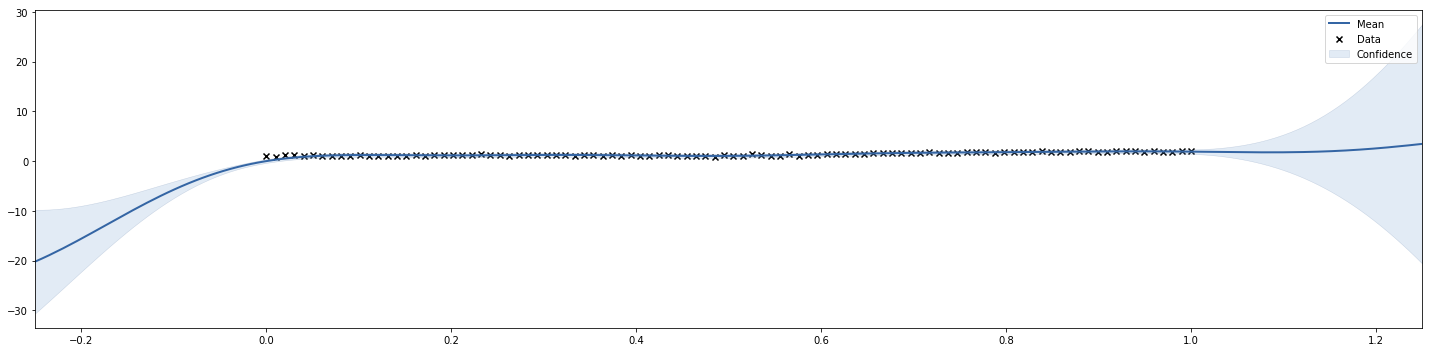

In [15]:
import GPy as GPy

#RBF
ker1 = GPy.kern.ExpQuad(1)
#Periodic
ker2 = GPy.kern.PeriodicExponential(1, period=6) 
#Polynomial of degree 6
ker3 = GPy.kern.Linear(1) 

kernel = ker1*ker2*ker3

# create a GP model
g_model = GPy.models.GPRegression(X,Y,kernel=kernel)

# it finds the optimal parameters of the RBF kernel by maxisiming the marginal likelihood 
g_model.optimize_restarts(5)# this maximise the marginal likelihood, with random restarts
#we  plot it
fig = g_model.plot(figsize=(20,5))
display(g_model)

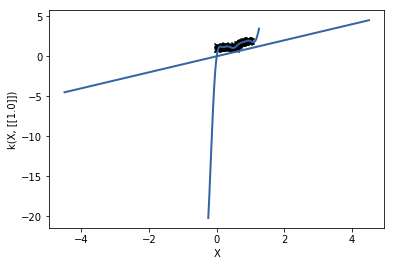

In [20]:
fig, ax = plt.subplots()
g_model.plot_mean(ax=ax)
ker3.plot(ax=ax)
g_model.plot_data(ax=ax)
plt.show()

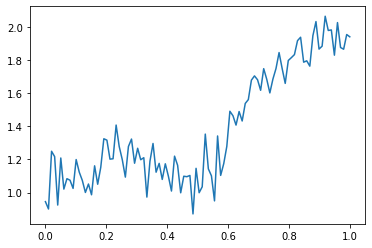

In [191]:
X = np.linspace(0,1,100)
Y = data.iloc[18,1:101].values
X = X[:, None]
Y = Y[:, None]
plt.plot(X,Y)

In [192]:
X_test = X
X_test = X_test.reshape(-1,1)

In [193]:
f2_pred, sigm2_pred = g_model.predict(X_test, kern=kernel)

In [194]:
posterior_probability_deriviative_is_positive = len(np.where(np.gradient(f2_pred[:,0],X_test[:,0])>0)[0])/len(f2_pred[:,0])
    
print("Probability Sales Increasing is: ", posterior_probability_deriviative_is_positive)
if posterior_probability_deriviative_is_positive>0.8:
    print("1")
else:
    print("0")

Probability Sales Increasing is:  0.7
0


In [116]:
data['Category'][0]

0

# Notes
* Test 1 - Used RBF & Matern32
 * Definitely don't use RBF as selected kernel
 * Removing linespace=100 improved the accuracy to 0.6 selecting Matern32
* Test 2 - Used RBF & Poly order = 3. Selected Poly
 * Worse - dropped to 0.5
* Test 3 - Used RBF & PeriodicExponential. Selected PeriodicExponential
 * Improved to 0.75
 * Increased to predict against 30 countries from 20 - Reduced to 73
 * Increased to predict against 50 countries from 30 - Reduced to 68
 * Increased optimize restarts from 5 to 10 - No change still 66
* Test 4 - RBF, PeriodicExponential, White
 * Had zero effect - probably because white looks like a zero based function
* Test 5 - ExpQuad, PeriodicExponential, Matern52. Selected ExpQuad
 * Typical 60% accuracy
* Test 6 - RBF, PeriodicExponential, Poly
 * Typical 60%
* Test 7 - ExpQuad, PeriodicMatern52, Linear, Poly
 * Thinking here was that a linear function may help identify the trend without the noise affecting it
 * Not sure exactly why I'm thinking this
 * didn't work, promising at smaller numbers of samples, got worse as I increased number of countries

In [381]:
rows = data.shape[0] - 45
actual = data.head(rows)['Category']

print(data.shape)
print(rows)
print(actual.shape[0])

(75, 102)
30
30


In [385]:
def run_model_2(x_in, y_in):
    #ker1 = GPy.kern.RBF(1)
    ker1 = GPy.kern.ExpQuad(1)
    ker2 = GPy.kern.PeriodicMatern52(1)
    ker3 = GPy.kern.Linear(1)
    ker4 = GPy.kern.(1)

    kernel = ker1*ker2*ker3

    # create a GP model
    g_model = GPy.models.GPRegression(x_in,y_in,kernel=kernel)

    # it finds the optimal parameters of the RBF kernel by maxisiming the marginal likelihood 
    g_model.optimize_restarts(5)# this maximise the marginal
    
    X_test = x
    X_test = X_test.reshape(-1,1)
    
    f2_pred, sigm2_pred = g_model.predict(X_test, kern=ker3)
    
    plt.plot(x_in[:,0],f2_pred)
    plt.show()
    
    posterior_probability_deriviative_is_positive = len(np.where(np.gradient(f2_pred[:,0],X_test[:,0])>0)[0])/len(f2_pred[:,0])
    
    #print("Probability Sales Increasing is: ", posterior_probability_deriviative_is_positive)
    if posterior_probability_deriviative_is_positive>0.8:
        return 1
    else:
        return 0

Iteration: 0 of 30
Optimization restart 1/5, f = -85.57310396749153
Optimization restart 2/5, f = -85.62676319280527
Optimization restart 3/5, f = -85.57314023258763
Optimization restart 4/5, f = -86.18628564302284
Optimization restart 5/5, f = -85.57310996275308


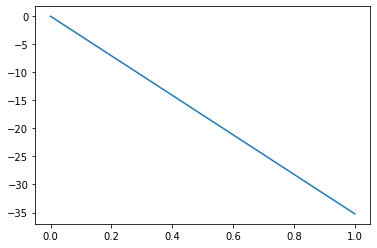

Iteration: 1 of 30
Optimization restart 1/5, f = -77.92649367689587
Optimization restart 2/5, f = -83.15322462633947
Optimization restart 3/5, f = -84.16356180978698
Optimization restart 4/5, f = -77.92659801862831
Optimization restart 5/5, f = -84.15107067667772


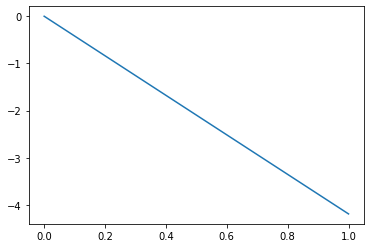

Iteration: 2 of 30
Optimization restart 1/5, f = -33.30739243696302
Optimization restart 2/5, f = -11.534230435699229
Optimization restart 3/5, f = -32.90604240485713
Optimization restart 4/5, f = -32.56983878253286
Optimization restart 5/5, f = -11.534229052004669


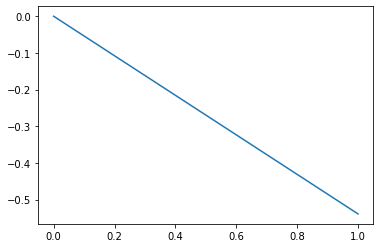

Iteration: 3 of 30
Optimization restart 1/5, f = -75.91170125950097
Optimization restart 2/5, f = -61.39045534625335
Optimization restart 3/5, f = -80.20184239648009
Optimization restart 4/5, f = -80.28760948476547
Optimization restart 5/5, f = -80.36539869359399


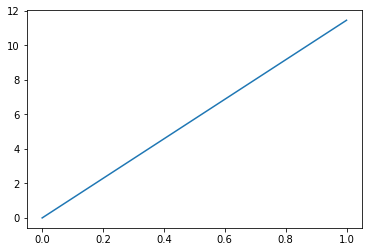

Iteration: 4 of 30
Optimization restart 1/5, f = -90.77234357405473
Optimization restart 2/5, f = -91.02940973428568
Optimization restart 3/5, f = -90.77234120257894
Optimization restart 4/5, f = -91.0214256385662
Optimization restart 5/5, f = -91.02671467707026


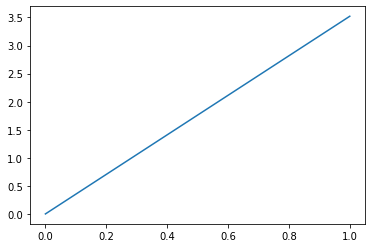

Iteration: 5 of 30
Optimization restart 1/5, f = 6.147873114091624
Optimization restart 2/5, f = 6.14787388431732
Optimization restart 3/5, f = 6.070625127389306
Optimization restart 4/5, f = 6.918615872219313
Optimization restart 5/5, f = 184.91667687013654


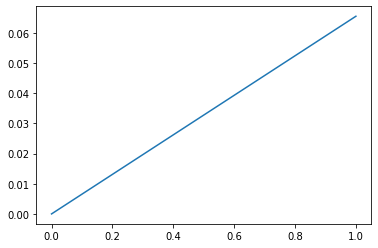

Iteration: 6 of 30
Optimization restart 1/5, f = -59.50813402073199
Optimization restart 2/5, f = -60.366550395627876
Optimization restart 3/5, f = -60.04475556070968
Optimization restart 4/5, f = -26.50341684467356
Optimization restart 5/5, f = -58.88279681226628


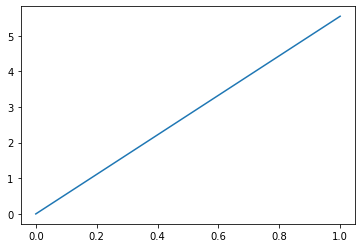

Iteration: 7 of 30
Optimization restart 1/5, f = 2.8446411339577864
Optimization restart 2/5, f = 108.5373711568896
Optimization restart 3/5, f = 5.2648183222594795
Optimization restart 4/5, f = 108.53736711820679
Optimization restart 5/5, f = 2.864535215058062


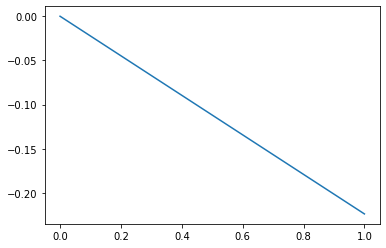

Iteration: 8 of 30
Optimization restart 1/5, f = 3.7777557703633917
Optimization restart 2/5, f = 0.4839863997240883
Optimization restart 3/5, f = 0.49032493429555757
Optimization restart 4/5, f = 0.4839863997038307
Optimization restart 5/5, f = 176.7265791190268


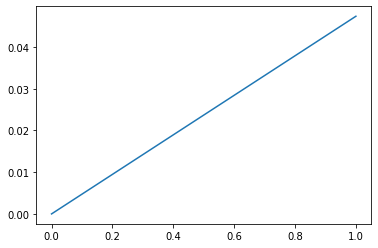

Iteration: 9 of 30
Optimization restart 1/5, f = -105.64357273289366
Optimization restart 2/5, f = -104.9414405316613
Optimization restart 3/5, f = -105.57806176278046
Optimization restart 4/5, f = -105.17834175735092
Optimization restart 5/5, f = -105.58394262310716


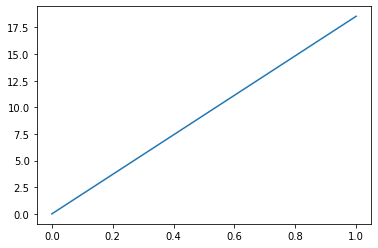

Iteration: 10 of 30
Optimization restart 1/5, f = 6.93356239632439
Optimization restart 2/5, f = 0.5382162153304009
Optimization restart 3/5, f = 35.316549621904095
Optimization restart 4/5, f = 180.74277399292617
Optimization restart 5/5, f = 6.199734536335207


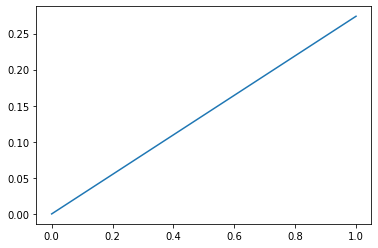

Iteration: 11 of 30
Optimization restart 1/5, f = -88.4050167343122
Optimization restart 2/5, f = -88.28027214925584
Optimization restart 3/5, f = -88.22368930033608
Optimization restart 4/5, f = -88.24255805340738
Optimization restart 5/5, f = -54.38596538478869


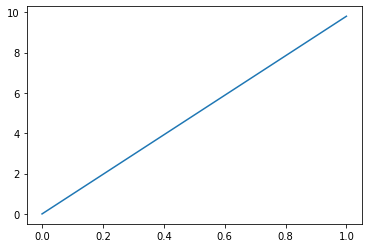

Iteration: 12 of 30
Optimization restart 1/5, f = -88.40961383334064
Optimization restart 2/5, f = -88.62057739636703
Optimization restart 3/5, f = -88.62072237660536
Optimization restart 4/5, f = -88.40961318926591
Optimization restart 5/5, f = -88.64293965545752


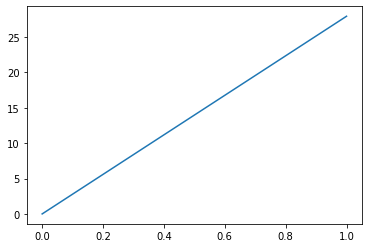

Iteration: 13 of 30
Optimization restart 1/5, f = -84.46666854940861
Optimization restart 2/5, f = -84.45639987033108
Optimization restart 3/5, f = -84.47062897011712
Optimization restart 4/5, f = -84.45639985883234
Optimization restart 5/5, f = -84.47252571529134


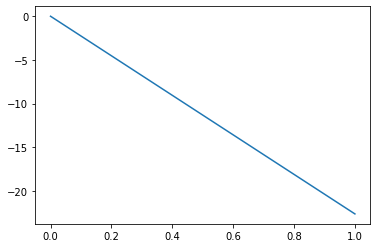

Iteration: 14 of 30
Optimization restart 1/5, f = -82.6510848833755
Optimization restart 2/5, f = -82.70639570788597
Optimization restart 3/5, f = -82.70609980183718
Optimization restart 4/5, f = -82.68189564113533
Optimization restart 5/5, f = -82.66146374416046


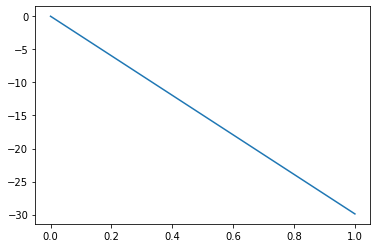

Iteration: 15 of 30
Optimization restart 1/5, f = 8.79977637555816
Optimization restart 2/5, f = 8.799776288831971
Optimization restart 3/5, f = -3.4196658999529106
Optimization restart 4/5, f = 9.328470016062873
Optimization restart 5/5, f = 9.3284700159356


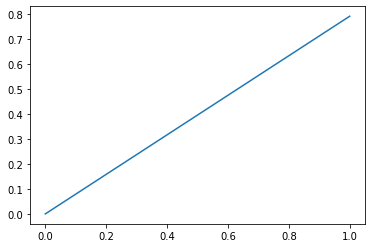

Iteration: 16 of 30
Optimization restart 1/5, f = -73.2526651572851
Optimization restart 2/5, f = -78.47146169052995
Optimization restart 3/5, f = -73.99973025492484
Optimization restart 4/5, f = -75.48481613048271
Optimization restart 5/5, f = -78.47157915009805


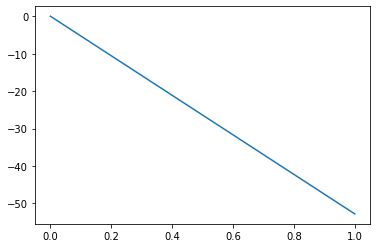

Iteration: 17 of 30
Optimization restart 1/5, f = 11.22472704747706
Optimization restart 2/5, f = 10.546099470131338
Optimization restart 3/5, f = 8.246196308607779
Optimization restart 4/5, f = 181.3102573186265
Optimization restart 5/5, f = 181.31025647908803


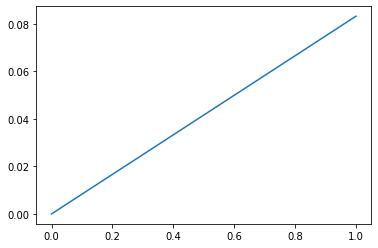

Iteration: 18 of 30
Optimization restart 1/5, f = 8.525111935739638
Optimization restart 2/5, f = 177.69927032518203
Optimization restart 3/5, f = 177.69927141762315
Optimization restart 4/5, f = 177.699253456578
Optimization restart 5/5, f = 6.806342369925957


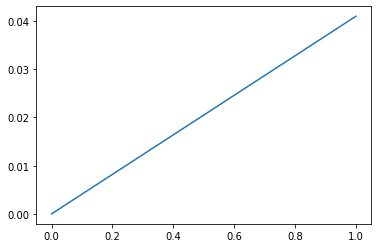

Iteration: 19 of 30
Optimization restart 1/5, f = -71.73101462741444
Optimization restart 2/5, f = -71.65170865444912
Optimization restart 3/5, f = -71.71620524671937
Optimization restart 4/5, f = -71.65193602192228
Optimization restart 5/5, f = -71.73049428414548


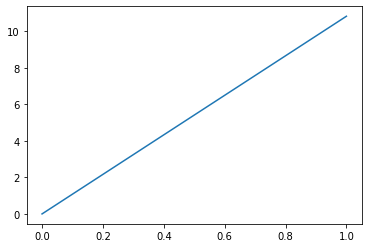

Iteration: 20 of 30
Optimization restart 1/5, f = 1.1584931078557474
Optimization restart 2/5, f = 1.9313638731841465
Optimization restart 3/5, f = 1.1584932807444304
Optimization restart 4/5, f = 161.61634564632698
Optimization restart 5/5, f = 1.1714046817172488


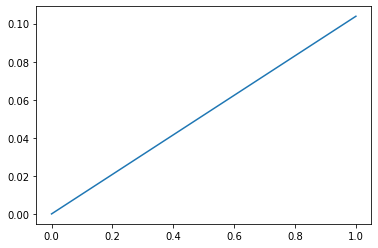

Iteration: 21 of 30
Optimization restart 1/5, f = -76.32492420943774
Optimization restart 2/5, f = -76.25517340003722
Optimization restart 3/5, f = -76.26500839173659
Optimization restart 4/5, f = -76.28162131407043
Optimization restart 5/5, f = -75.8951360384876


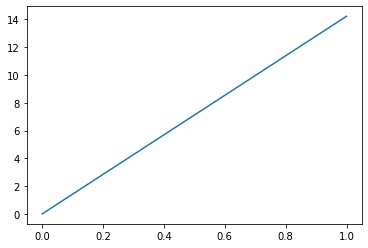

Iteration: 22 of 30
Optimization restart 1/5, f = -43.60663770956531
Optimization restart 2/5, f = -43.5898091431122
Optimization restart 3/5, f = -20.090211272674175
Optimization restart 4/5, f = -20.09021157780687
Optimization restart 5/5, f = -43.63411407165438


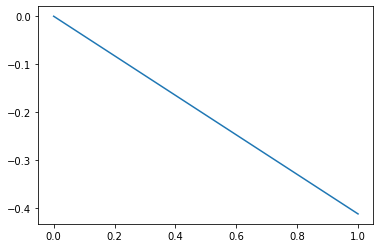

Iteration: 23 of 30
Optimization restart 1/5, f = -47.21957811827519
Optimization restart 2/5, f = -47.12716852676248
Optimization restart 3/5, f = -28.270181807724693
Optimization restart 4/5, f = -46.2187812528478
Optimization restart 5/5, f = -47.19719562098787


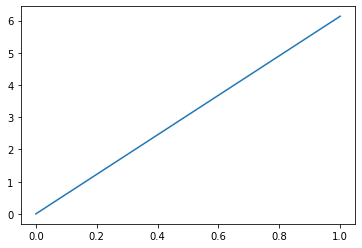

Iteration: 24 of 30
Optimization restart 1/5, f = -3.101977694419027
Optimization restart 2/5, f = 109.73924942086406
Optimization restart 3/5, f = 68.77008009747335
Optimization restart 4/5, f = -1.6680773031755507
Optimization restart 5/5, f = -19.564809760628663


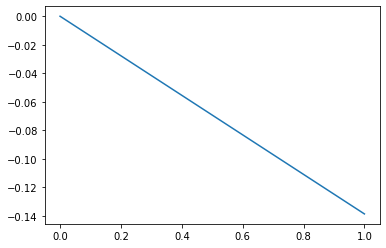

Iteration: 25 of 30
Optimization restart 1/5, f = -73.0431669716175
Optimization restart 2/5, f = -73.04321586751087
Optimization restart 3/5, f = -85.99530461910192
Optimization restart 4/5, f = -81.63682017610867
Optimization restart 5/5, f = -79.76810321529078


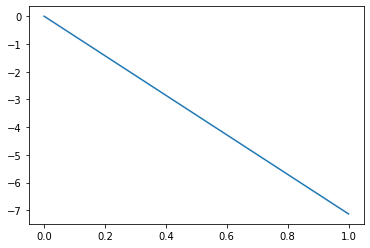

Iteration: 26 of 30
Optimization restart 1/5, f = -89.38398797461949
Optimization restart 2/5, f = -92.44033212584671
Optimization restart 3/5, f = -91.24609721205186
Optimization restart 4/5, f = -91.14781735910114
Optimization restart 5/5, f = -90.44655943459006


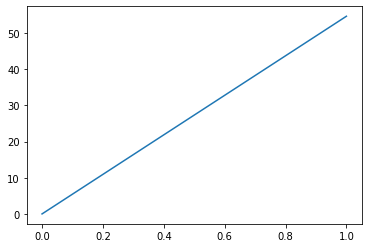

Iteration: 27 of 30
Optimization restart 1/5, f = 3.3270993824183392
Optimization restart 2/5, f = 101.35189207536591
Optimization restart 3/5, f = 178.5458530138472
Optimization restart 4/5, f = 178.54586179230006
Optimization restart 5/5, f = 178.54577284053195


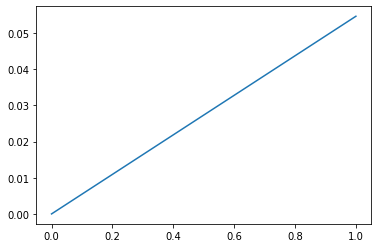

Iteration: 28 of 30
Optimization restart 1/5, f = -100.13163745246862
Optimization restart 2/5, f = -100.89937085725379
Optimization restart 3/5, f = -100.87343047537212
Optimization restart 4/5, f = -100.8735163191986
Optimization restart 5/5, f = -100.87345614934006


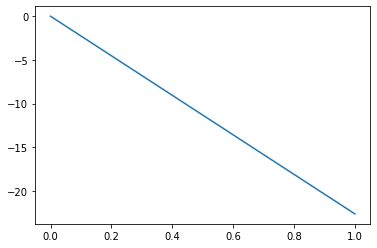

Iteration: 29 of 30
Optimization restart 1/5, f = -90.45902836023188
Optimization restart 2/5, f = -90.40670328032732
Optimization restart 3/5, f = -81.78341296152314
Optimization restart 4/5, f = -81.78334840679608
Optimization restart 5/5, f = -90.46796564723608


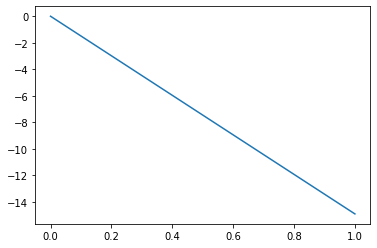

[0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0]


In [386]:
x = np.linspace(0,1,100).reshape(-1,1)
# Decision = pd.DataFrame(columns=['Id','Category'])
predicted = []
for r in range(rows):
    print(f'Iteration: {r} of {rows}')
    id_row = data.iloc[r,0]
    y = data.iloc[r,1:101].values[:,None]
    decision = run_model_2(x,y)
    predicted.append(decision)
#     Decision = Decision.append({'Id': int(id_row), 'Category': int(decision)}, ignore_index=True) 
#     print(Decision)

# Decision.to_csv('submission_1.csv')
print(predicted)

In [387]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

print(actual)
print(predicted)

results = confusion_matrix(actual, predicted) 
print(results)
print('Accuracy Score :', accuracy_score(actual, predicted))
print ('The Report : ')
print (classification_report(actual, predicted))

0     0
1     0
2     0
3     1
4     1
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    1
24    1
25    0
26    0
27    0
28    0
29    0
Name: Category, dtype: int64
[0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0]
[[10 13]
 [ 2  5]]
Accuracy Score : 0.5
The Report : 
              precision    recall  f1-score   support

           0       0.83      0.43      0.57        23
           1       0.28      0.71      0.40         7

    accuracy                           0.50        30
   macro avg       0.56      0.57      0.49        30
weighted avg       0.70      0.50      0.53        30

